In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re,string
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score
from sklearn.model_selection import train_test_split
from nltk.corpus import wordnet
import re
import warnings
import torch
warnings.filterwarnings('ignore')

In [9]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#torch.cuda.is_available()
print(device)

cuda


In [10]:
%%time
df = pd.read_csv('IMDB-Dataset.csv', encoding='latin-1')

CPU times: total: 2.19 s
Wall time: 4.21 s


In [11]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
#Customize stopword as per data
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
new_stopwords = ["would","shall","could","might"]
stop_words.extend(new_stopwords)
stop_words.remove("not")
stop_words=set(stop_words)
print(stop_words)

{'her', 'to', 'be', 'doing', 'wouldn', 'himself', 'they', 'most', "she's", 'before', 'some', 'hers', 'again', 'had', 'm', 'whom', "couldn't", "hasn't", 'shall', 'my', 'all', 's', 'are', 'shouldn', 'between', 'them', "wouldn't", 'about', 'out', 'there', 'a', 'too', 'just', 'you', 'each', 'did', 'is', 'he', 'theirs', 've', 'y', 'off', "you'll", 'more', 'haven', 'down', 'yourselves', 'those', 'very', "didn't", "haven't", 'myself', 'o', 'who', 're', 'do', 'by', 'll', 'over', 'doesn', 'no', 'i', 'his', 'their', 'that', 'into', 'above', 'up', "needn't", 'would', 'me', 'only', "mightn't", 'been', 'mustn', "that'll", 'then', 'your', 'any', 'an', "weren't", "won't", 'this', 'won', 'which', 'having', 'own', 'here', 'ain', 'should', 'will', "mustn't", 'we', 't', 'on', 'didn', 'but', 'under', 'other', 'once', 'in', 'when', "should've", 'ma', 'of', 'mightn', "you've", 'has', 'was', 'and', 'through', 'd', "hadn't", 'have', 'than', 'she', 'does', 'these', 'could', 'or', 'its', 'few', 'itself', 'being

## Data Cleaning and Preprocessing pipeline

In [13]:
#Removing special character
def remove_special_character(content):
    return re.sub('\W+',' ', content )#re.sub('\[[^&@#!]]*\]', '', content)

# Removing URL's
def remove_url(content):
    return re.sub(r'http\S+', '', content)

#Removing the stopwords from text
def remove_stopwords(content):
    clean_data = []
    for i in content.split():
        if i.strip().lower() not in stop_words and i.strip().lower().isalpha():
            clean_data.append(i.strip().lower())
    return " ".join(clean_data)

# Expansion of english contractions
def contraction_expansion(content):
    content = re.sub(r"won\'t", "would not", content)
    content = re.sub(r"can\'t", "can not", content)
    content = re.sub(r"don\'t", "do not", content)
    content = re.sub(r"shouldn\'t", "should not", content)
    content = re.sub(r"needn\'t", "need not", content)
    content = re.sub(r"hasn\'t", "has not", content)
    content = re.sub(r"haven\'t", "have not", content)
    content = re.sub(r"weren\'t", "were not", content)
    content = re.sub(r"mightn\'t", "might not", content)
    content = re.sub(r"didn\'t", "did not", content)
    content = re.sub(r"n\'t", " not", content)
    '''content = re.sub(r"\'re", " are", content)
    content = re.sub(r"\'s", " is", content)
    content = re.sub(r"\'d", " would", content)
    content = re.sub(r"\'ll", " will", content)
    content = re.sub(r"\'t", " not", content)
    content = re.sub(r"\'ve", " have", content)
    content = re.sub(r"\'m", " am", content)'''
    return content

#Data preprocessing
def data_cleaning(content):
    content = contraction_expansion(content)
    content = remove_special_character(content)
    content = remove_url(content)
    
    content = remove_stopwords(content)    
    return content

In [14]:
%%time
pd.options.display.max_colwidth = 1000
#Data cleaning
df['Reviews_clean']=df['Reviews'].apply(data_cleaning)
df.head(5)

CPU times: total: 13.5 s
Wall time: 19.2 s


,Ratings,Reviews,Movies,Resenhas,Reviews_clean
0,1.0,"*Disclaimer: I only watched this movie as a conditional agreement. And I see films for free. I wouldn't be caught dead giving my hard earned money to these idiots.Well, to explain the depth of this 'film', I could write my shortest review, ever. Don't see this movie. It is by far the stupidest, lamest, most lazy, and unbelievably UNFUNNY movie I have ever seen. It is a total disaster. But since my hatred for this movie, and the others like it, extends far beyond one viewing, I think I'll go on for a bit.I don't know any of the people in the movie besides Carmen Electra, Vanessa Minnillo, and Kim Kardashian, but it doesn't matter. They're all horrible, though I think that was the point. The editing is flat out horrible, and possibly blatant continuity errors make this crapfast even crappier than I thought it would be. Now I know that these films are not supposed to be serious at all, but come on, it's film-making 101 that if someone gets a minor facial cut, it should be there in the...",Disaster Movie,"* IsenÃ§Ã£o de responsabilidade: eu sÃ³ assisti esse filme como um acordo condicional. E eu vejo filmes de graÃ§a. Eu nÃ£o seria pego morto dando meu dinheiro suado a esses idiotas. Bem, para explicar a profundidade desse 'filme', eu poderia escrever minha crÃ­tica mais curta de todos os tempos. NÃ£o vÃª este filme. Ã de longe o filme mais estÃºpido, lamenta, preguiÃ§oso e inacreditavelmente UNFUNNY que eu jÃ¡ vi. Ã um desastre total. Mas como o meu Ã³dio por este filme e por outros, se estende muito alÃ©m de uma exibiÃ§Ã£o, acho que vou continuar um pouco. NÃ£o conheÃ§o nenhuma das pessoas do filme alÃ©m de Carmen Electra, Vanessa Minnillo, e Kim Kardashian, mas isso nÃ£o importa. Eles sÃ£o todos horrÃ­veis, embora eu ache que esse seja o ponto. A ediÃ§Ã£o Ã© horrÃ­vel e, possivelmente, erros de continuidade flagrantes tornam essa porcaria ainda mais horrÃ­vel do que eu pensava. Agora eu sei que esses filmes nÃ£o devem ser sÃ©rios, mas vamos lÃ¡, Ã© o cinema 101 que se alguÃ©m f...",disclaimer watched movie conditional agreement see films free not caught dead giving hard earned money idiots well explain depth film write shortest review ever not see movie far stupidest lamest lazy unbelievably unfunny movie ever seen total disaster since hatred movie others like extends far beyond one viewing think go bit not know people movie besides carmen electra vanessa minnillo kim kardashian not matter horrible though think point editing flat horrible possibly blatant continuity errors make crapfast even crappier thought know films not supposed serious come film making someone gets minor facial cut next shot someone gets cut sword blood least cut though since narnia films get away give disaster movie pass jokes thoughtless mindless physical gags obviously take popular movies last year late well including best picture nominees know saddest thing stupid movies not care much money make many cameos sorry ass excuses films taking away jobs actors writers directors truly deserv...
1,1.0,"I am writing this in hopes that this gets put over the previous review of this ""film"". How anyone can find this slop entertaining is completely beyond me. First of all a spoof film entitled ""Disaster Movie"", should indeed be a spoof on disaster films. Now I have seen 1 (yes count them, 1) disaster film being spoofed, that being ""Twister"". How does Juno, Iron Man, Batman, The Hulk, Alvin and the Chipmunks, Amy Winehouse, or Hancock register as Disaster films? Selzterwater and Failburg once again have shown that they lack any sort of writing skill and humor. Having unfortunately been tortured with Date Movie and Epic Movie I know exactly what to expect from these two...no plot, no jokes just bad references and cheaply remade scenes from other films. Someone should have informed them that satire is more than just copy and paste from one film to another, though I shouldn't say that because some of these ac

### Data Overview

In [10]:
#Checking for missing value
df.isna().sum()

Ratings           0
Reviews           0
Movies           25
Resenhas          0
Reviews_clean     0
dtype: int64

In [11]:
df['Ratings'].describe()

count    150000.000000
mean          5.500000
std           2.872291
min           1.000000
25%           3.000000
50%           5.500000
75%           8.000000
max          10.000000
Name: Ratings, dtype: float64

In [12]:
df['Reviews_clean'].describe()

count                                                                   150000
unique                                                                  149755
top       story soundtrack dialog graphic reasonableness entertainment overall
freq                                                                        10
Name: Reviews_clean, dtype: object

In [13]:
print('Unique reviews:%s' % df.Reviews_clean.nunique())
print('Unique movie names:%s' % df.Movies.nunique())
print('No of ratings:%s'% df.Ratings.count())

Unique reviews:149755
Unique movie names:14206
No of ratings:150000


## Exploratory Data Analysis

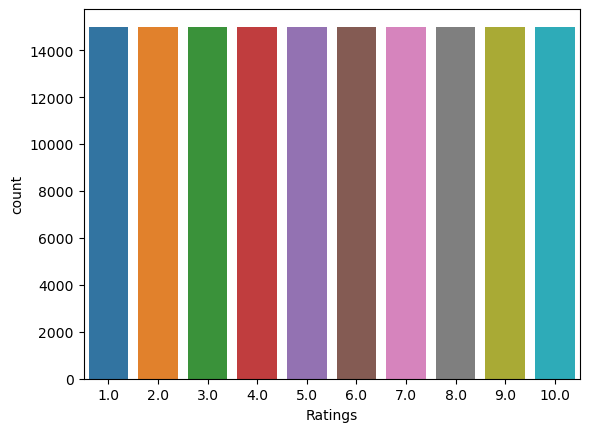

1.0     15000
2.0     15000
4.0     15000
3.0     15000
5.0     15000
6.0     15000
8.0     15000
7.0     15000
10.0    15000
9.0     15000
Name: Ratings, dtype: int64


In [14]:
#Checking for Class Imbalance 
sns.countplot(x=df['Ratings'])
plt.show()
print(df['Ratings'].value_counts())

## Visualization of Important Words from Positive Reviews

CPU times: total: 28.4 s
Wall time: 58.7 s


(-0.5, 1499.5, 799.5, -0.5)

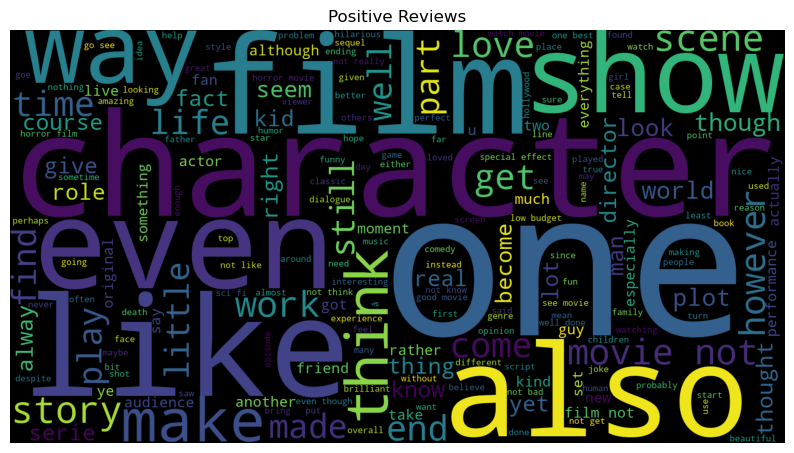

In [15]:
%%time
sentences=df['Reviews_clean']
pos=' '.join(map(str,sentences[df['Ratings']>=7]))
neg=' '.join(map(str,sentences[df['Ratings']<=4]))
  
pos_wordcloud = WordCloud(width = 1500, height = 800, 
                background_color ='black', 
                stopwords = stop_words, 
                min_font_size = 15).generate(pos) 

plt.figure(figsize=(10,10))
plt.imshow(pos_wordcloud)
plt.title('Positive Reviews')
plt.axis('off')

## Visualization of Important Words from Negative Reviews

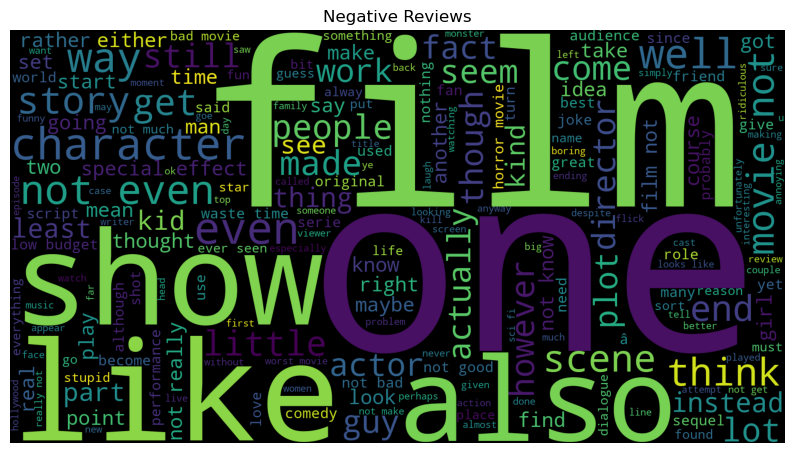

CPU times: total: 24.9 s
Wall time: 34.7 s


In [16]:
%%time

neg_wordcloud = WordCloud(width = 1500, height = 800, 
                background_color ='black', 
                stopwords = stop_words, 
                min_font_size = 15).generate(neg) 

plt.figure(figsize=(10,10))
plt.imshow(neg_wordcloud)
plt.title('Negative Reviews')
plt.axis('off')
plt.show() 

## Basic Statistic of Review data

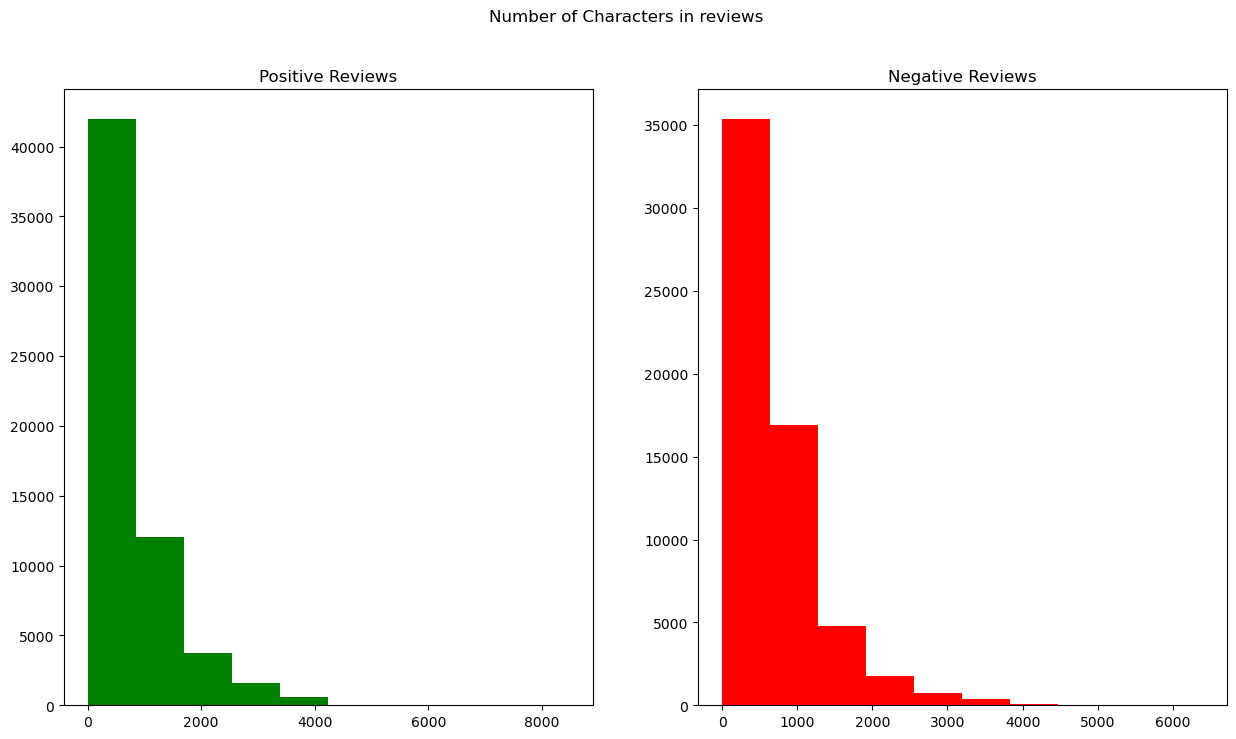

In [20]:
#Visulaization of number of charactor in reviews
figure,(pos_ax,neg_ax)=plt.subplots(1,2,figsize=(15,8))
len_pos_review=df[df['Ratings']>=7]['Reviews_clean'].str.len()
pos_ax.hist(len_pos_review,color='green')
pos_ax.set_title('Positive Reviews')
len_neg_review=df[df['Ratings']<=4]['Reviews_clean'].str.len()
neg_ax.hist(len_neg_review,color='red')
neg_ax.set_title('Negative Reviews')
figure.suptitle('Number of Characters in reviews')
plt.show()

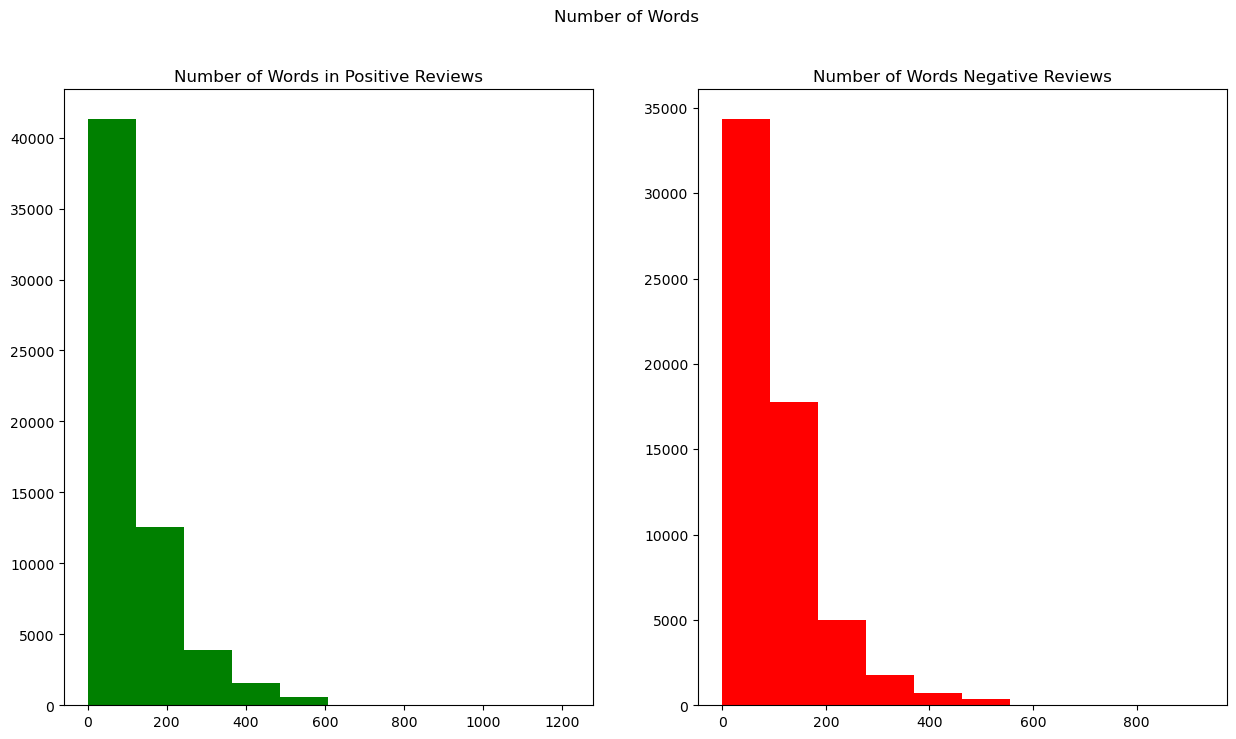

In [20]:
#Visulaization of number of words in reviews
figure,(pos_ax,neg_ax)=plt.subplots(1,2,figsize=(15,8))
pos_word=df[df['Ratings']>=7]['Reviews_clean'].str.split().map(lambda review: len(review))
pos_ax.hist(pos_word,color='green')
pos_ax.set_title('Number of Words in Positive Reviews')
neg_word=df[df['Ratings']<=4]['Reviews_clean'].str.split().map(lambda review: len(review))
neg_ax.hist(neg_word,color='red')
neg_ax.set_title('Number of Words Negative Reviews')
figure.suptitle('Number of Words')
plt.show()

Text(0.5, 0.98, 'Average word length in Reviews')

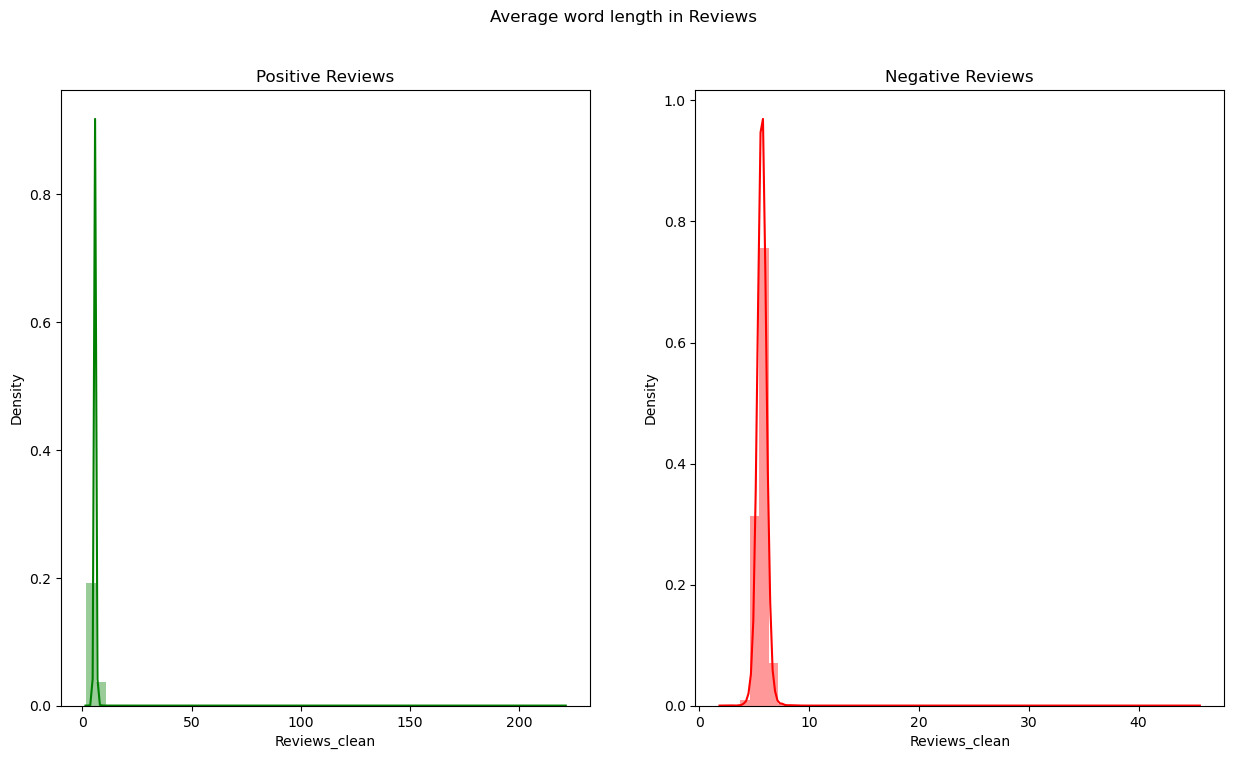

In [22]:
#Visulaize average of words in reviews

figure,(pos_ax,neg_ax)=plt.subplots(1,2,figsize=(15,8))
pos_word=df[df['Ratings']>=7]['Reviews_clean'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(pos_word.map(lambda x: np.mean(x)),ax=pos_ax,color='green')
pos_ax.set_title('Positive Reviews')
neg_word=df[df['Ratings']<=4]['Reviews_clean'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(neg_word.map(lambda x: np.mean(x)),ax=neg_ax,color='red')
neg_ax.set_title('Negative Reviews')
figure.suptitle('Average word length in Reviews')

In [23]:
#Get important feature by using Countvectorizer
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

<class 'list'>


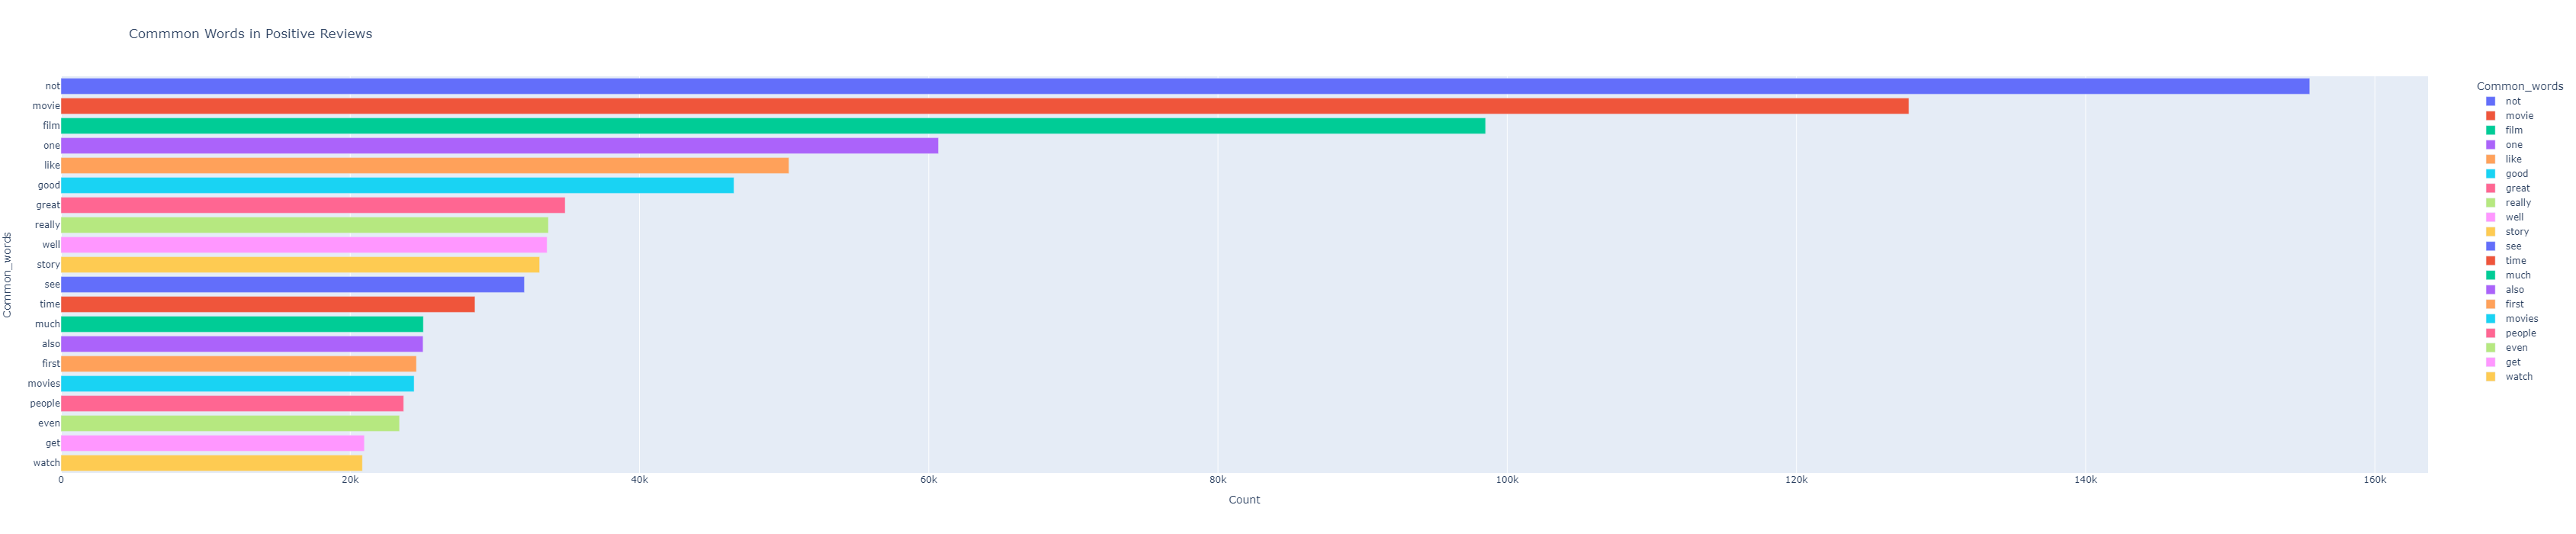

In [25]:
#top 20 unigrams
most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings']>=7],20,1) #list of tuples
most_common_uni = dict(most_common_uni)#dict
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon Words in Positive Reviews', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

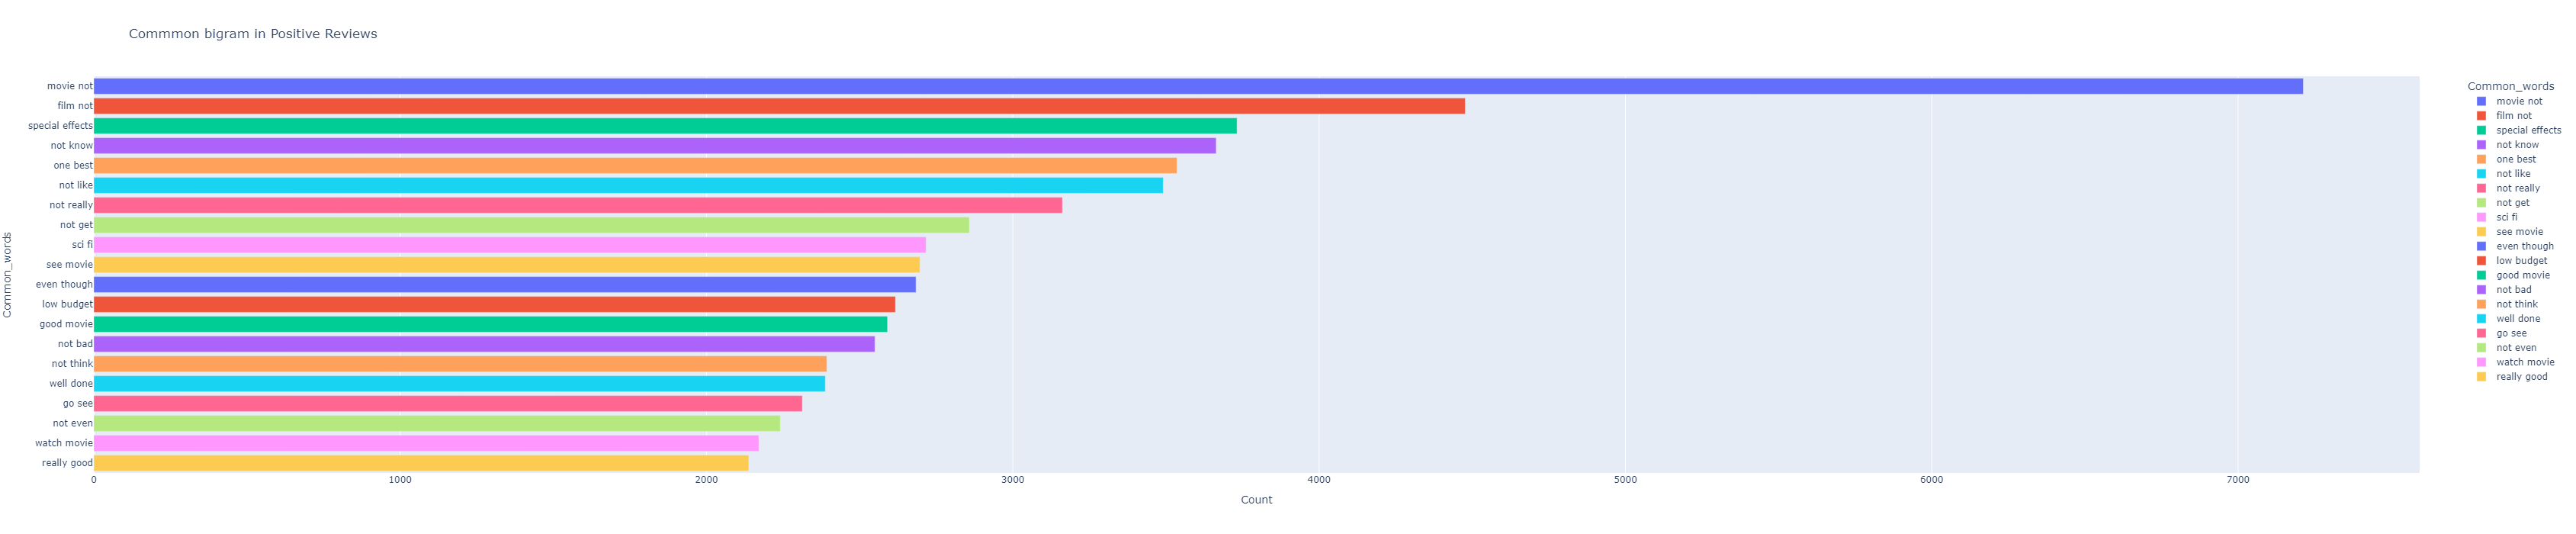

In [25]:
#top 20 bigrams
most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings']>=7],20,2)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon bigram in Positive Reviews', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [26]:
pd.options.display.max_colwidth = 1000
df[["Reviews","Ratings","Movies"]][(df['Ratings']>=7)&(df['Reviews'].str.contains("not like| not want| not big fan"))].head(30)

,Reviews,Ratings,Movies
90193,"Starring: Carmen Electra and Brooke Hogan.Scary fish story that really has a lot going for it â Scares,Girls in bikinis and a creature that is NEW ! So let's go out to sea and study,No not like ""The Suite Life On Deck"",But more like Fred Olen Ray 'Showtime' movies in the water.There are villains without fins and people with Brains & Boobs.The creature effects are really good looking as CGI and just fun when do in real time and on set with actors interacting with the teeth plus.This ATOLL set would make a great tourist attraction with a re-tooled 'BRUCE the shark' that was replaced at Universal Studios,Florida.",7.0,2-Headed Shark Attack
90198,"Some folks really downgraded this movie and the two main stars, Casper Van Dien and Elelnia Eliniak by stating their careers were over because of this movie. Come on folks these two are professional actors and know how to act. This movie was not as horrible as some would have us believe nor did their careers end. Just because one did not like the movie is no reason to slam dunk the actors. The movie was actually quite good because of the two main stars It's quite conceivable for a character named Van Helsing not to know at one time in earths ancient culture he had a relative who was a vampire killer. As far as the script it was okay, the cinematography was good as far as one can be from being inside a spacecraft. The vampires exhibited great strength and stealth. They were tall dark and handsome or beautiful and tempting. In the end all the vampires were slain at the expense of most of the crew. To see which vampire remains and which crew members remain and how the movie ends which...",7.0,Dracula 3000
90222,"Alone in the Dark 2 is a fun little Supernatural Thriller with a good little cast & i enjoyed it, it looks like a movie & was actually filmed on film which was very rare back then, & even more rare now it's almost extinct, it's all digital now only ""Tarantino"" still uses film that I've heard of!!!\nAlso the film looks very good with good use of colour & a very slick look with lots of blue & green, a very cool opening actually with a view of new york city & central park, then we go down to central park where we meet 3 witch hunters running from the old Hag, it's very cool.\nThe first film was just ok, not great but not as terrible as all those way over the top reviews destroying it was saying, as there's alot of much worse films out there!!!\nThe music is really good, it's eerie & full of suspense & this little B-movie actually has a strong creepy atmosphere & feels like one of those rare Horror gems you find on t.v in the middle of the night, good solid film.""Alone in the Dark 2"" r...",7.0,Alone in the Dark II
90251,"You have to understand with these kinds of movies (boa vs. python,frankenfish, sasquatch hunters, rottweiler, tower of blood), you are not going to like it. You are going to think it was soo bad it was hilarious. Most importantly you cannot take it seriously as a movie. You have to also watch it with friends so you can all yell and say how stupid something was, or call something that is about to happen. I have seen about 8 movies like this one and I did not like one, but I had an amusing time watching it. WARNING: If you are looking for a scary movie or an interesting suspenseful movie DO NOT WATCH THIS! If you are on the other hand seeing something with friends, and you cant find a good comedy watch one of these. If you pick this movie out because you thought it would be cool, you should have been eliminated from the gene pool years ago. My personal favorite out of these 5 is sasquatch hunters, it was beyond helpless.",7.0,Boa vs. Python
90287,"OK, let's look past the fact that the director, Christina Peters (aka Kat Slater), went on to direct a profusion of pulsating porn including, but not limited to, ""Young Sluts, Inc."" 1 thru 15 and ""Cum Swappers"" 1 thru 4.Let's look past the fact that basically every review is slamming th

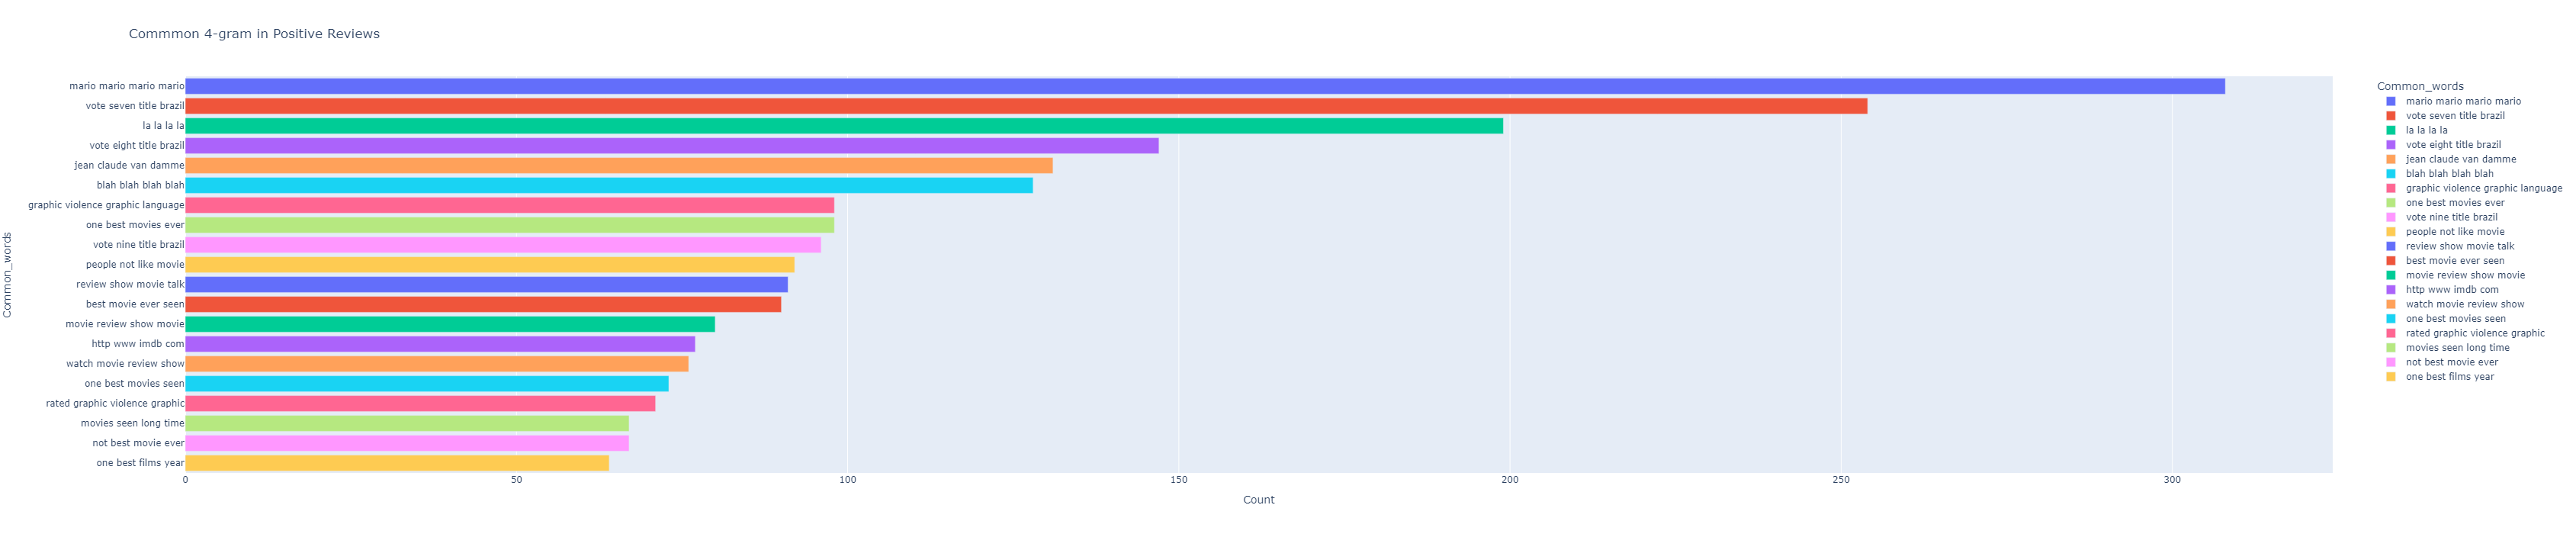

In [27]:
#top 20 4-grams in positive reviews
most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings']>=7],20,4)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon 4-gram in Positive Reviews', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [28]:
pd.options.display.max_colwidth = 1000
df[["Reviews","Ratings","Movies"]][(df['Ratings']>=9)&(df['Reviews'].str.contains("bad review"))].head(30)

,Reviews,Ratings,Movies
120211,"This movie was a blast for my little guys, they loved every minute of it, I have read all of the bad reviews, and could not disagree more. This movie, is pure and good. There is just enough action to keep the kids interested, and not so much that you leave the theater with them bouncing off the walls either. It is funny with jokes that everyone can appreciate. I think people have gotten used to so much violence and adult content in our kids movies that they are disappointed when it is missing, like the movie wasn't entertaining enough for the parents. Well, NEWS FLASH.....It's a kids movie, and a perfect one at that. Kids need these kinds of movies, not Spongebob and the like which are more to entertain the parents.",9.0,Doogal
120238,"I am a huge horror buff and prefer pieces that delve into the characters psychological issues. This film was awesome on so many levels, the acting and writing were fantastic and creepy and I was afraid or and empathetic with the murderer the whole time. What an interesting study on the line between sick and a danger to others, and the line between being a mean girl and being psychotic. Set in a great location, a house full of creepy art, in the winter in Conneticut and with amazing performances from many of my favorite actresses. It actually shocks me that others have given this such a bad review, I loved this movie, I guess it goes to show you everyone will have a different opinion but I say don't miss this film!",9.0,#Horror
120239,"No idea why there are so many bad reviews here? I loved it; I thought it was a very advanced thoughtful film. The graphic were #killer. The comparison of video game culture and young girl culture was spot on. This film makes connections that I've never seen on the big screen but, do see in every day life.The casting was spot on, Hello 12 year-old girls are supposed to be a little annoying. I do wish that more directors would take color into more consideration the way this film does. T The highly stylized sets make the murder scenes more believable because everything is so unbelievable. How can you live in 2016 and not ""get""a film about social media and accelerationism. #duh Someone explain this to me.",9.0,#Horror
120273,"What do you get when you cross Love Story with Star Wars with Blade Runner with Back to the Future with MTV? Love Story 2050, that's what. What a fun movie for the entire family. This fantasy of epic proportions is much, much better than AI, a similar sci-fi classic. The thrills are non-stop in this blockbuster, from its lead off car chase to bike racing stunts to the vantage point of a moving roller coaster to speeding hover-craft--you will be on the edge of your seat from beginning to end. The version I saw was only partially in English and I still was glued to the screen. I can't wait to see a version with subtitles. The mega budget special effects are out of this world and highly convincing. The future vision of XBox was hilarious. Those who are complaining about how long this movie is simply don't understand Bollywood. The three hours went by quickly; it seemed to be only an hour. There could have been a better twist with the Darth Vader character. For example, I suspected tha...",9.0,Love Story 2050
120334,"I don't understand the negative reviews for this movie.This deserve a 10 stars.Something is definitely wrong with people when they do not care for a positive message in a movie.This movie was beyond great,had a touch of everything.It shows what can happen when a person's influence can change lives.These young boys had no hope,they could not see a promising future.The streets are what they knew,and of course,some of you can't relate, but if you are a fair person,then you will try to understand it from that viewpoint.I was not raised in a bad neighborhood,nor the streets, and i still totally get this movie.Life is about sacrifices and there were many a lessons in this movie that are based on real life for s

In [29]:
pd.options.display.max_colwidth = 1000
df[["Reviews","Ratings","Movies"]][(df['Ratings']<=4)&(df['Reviews'].str.contains("blah blah blah| la la la la| mario mario mario mario"))].head(30)

,Reviews,Ratings,Movies
571,"Well I wasn't sure what language this film was made in - so I put it through Babel Fish. Here is a typical line translated:'Blah blah blah..blah blah blah blah, blah de blah'.This actually makes more sense than the lines the actors were uttering.Effects wise I spotted left over props from Voyage to the bottom of the Sea (Think Giant squids and Fish Men)Best line (from a cigar smoking middle aged Man to a 9 year old) 'This World's become a place where boys like you and me have to grow up fast' (he looks at least 50 for God's sake)This film makes a previous SyFy effort (Savage planet - about alien killer bears) look like a masterpiece.Great going guys :)",1.0,War of the Worlds 2: The Next Wave
1070,"No, it doesn't. This is the WORST show. If you can even call it that, on the internet. Don't worry, I am not that kind of guy who bashes on kids for making videos, usually they're actually as good as work done by adults, just maybe the voices are different. But not here. Once you watch just one of his videos you immediately hate Lucas, the infamous maker of ""Fred"", and plays as him. You don't care about his personal life or ANYTHING, all you want and need to do is tell him off. He got MOST subscribed on You Tube for months on end, and he does NOT deserve that badge. I wouldn't mind if he were an O.K actor but, he just... let me explain. A Fred video in a nutshell... ""Blah blah blah blah blah O.M.G Judy ha i am so not funny blah blah blah pointless yelling wow look Kevin blah blah blah mom comes home and says something unfunny, blah blah blah, subscribe. To the person who just wasted your time and gave you partial deafness in your ears."" All that and some high pitching easily done i...",1.0,Fred
3534,"This is truly a horrid movie. But (maybe..) worth watching once because it's an instant, modern camp classic.Now, if you notice, I only submit bad reviews to this site, but that's because bad movies are a hobby of sorts for me. I'm one who thinks you can learn more about film from bad movies than good ones, and if there is any thuth to that, every film student's thesis should be written about Battlefield Earth.You don't just wonder what they were thinking. You're amazed that so many people had to be so incompetent for this movie to get released. It defies comprehension. They had the budget, some (well, ok.. ) 'capable' (servicable might be a better term) actors.. so how could any outfit fail so miseraby?It's an amazing film in all the ways that it sucks. It combines all the elements of a horrid film - employs characters which don't develop in any way, that you don't care about (or even root against), who act in very irrational or excessively stupid ways for the purpose of lengtheni...",1.0,Battlefield Earth
3970,"I love the IMDb but I've noticed a very sad trend... seems like users here feel they have to defend truly terrible movies. Just look at the user reviews for ""Hudson Hawk"" or ""Ishtar"" and you'll see titles like ""Not As Bad As They Say,"" ""Under-Rated Classic,"" and the offensive ""I LOVE This Movie.""Grow up! It's not a good idea to rescue trash cinema from the dumpster. Let's be adults and let films like ""Leonard, Part 6"" get the treatment they deserve. And oh how this film deserves a lot of treatment... ""Leonard"" is a movie with no redeeming value. Bill Cosby stars as a secret agent who has to save the world from an evil woman who blah blah blah... why bother? The movie tries to be an action film while simultaneously spoofing action films. (Schwarzenegger would later fail at this with the nauseating ""Last Action Hero"") What we're left with is a mess of a movie and Cosby- one of the all-time great comedians- can't even get one genuine laugh out of the deal. I have a passion for bad mov...",1.0,Leonard Part 6
4538,"Forget Manos, this is without a doubt the worst movie EVER MADE! The incredibly dull monster, bad dubbing, bad acting, annoying narration and lack of narration during parts 

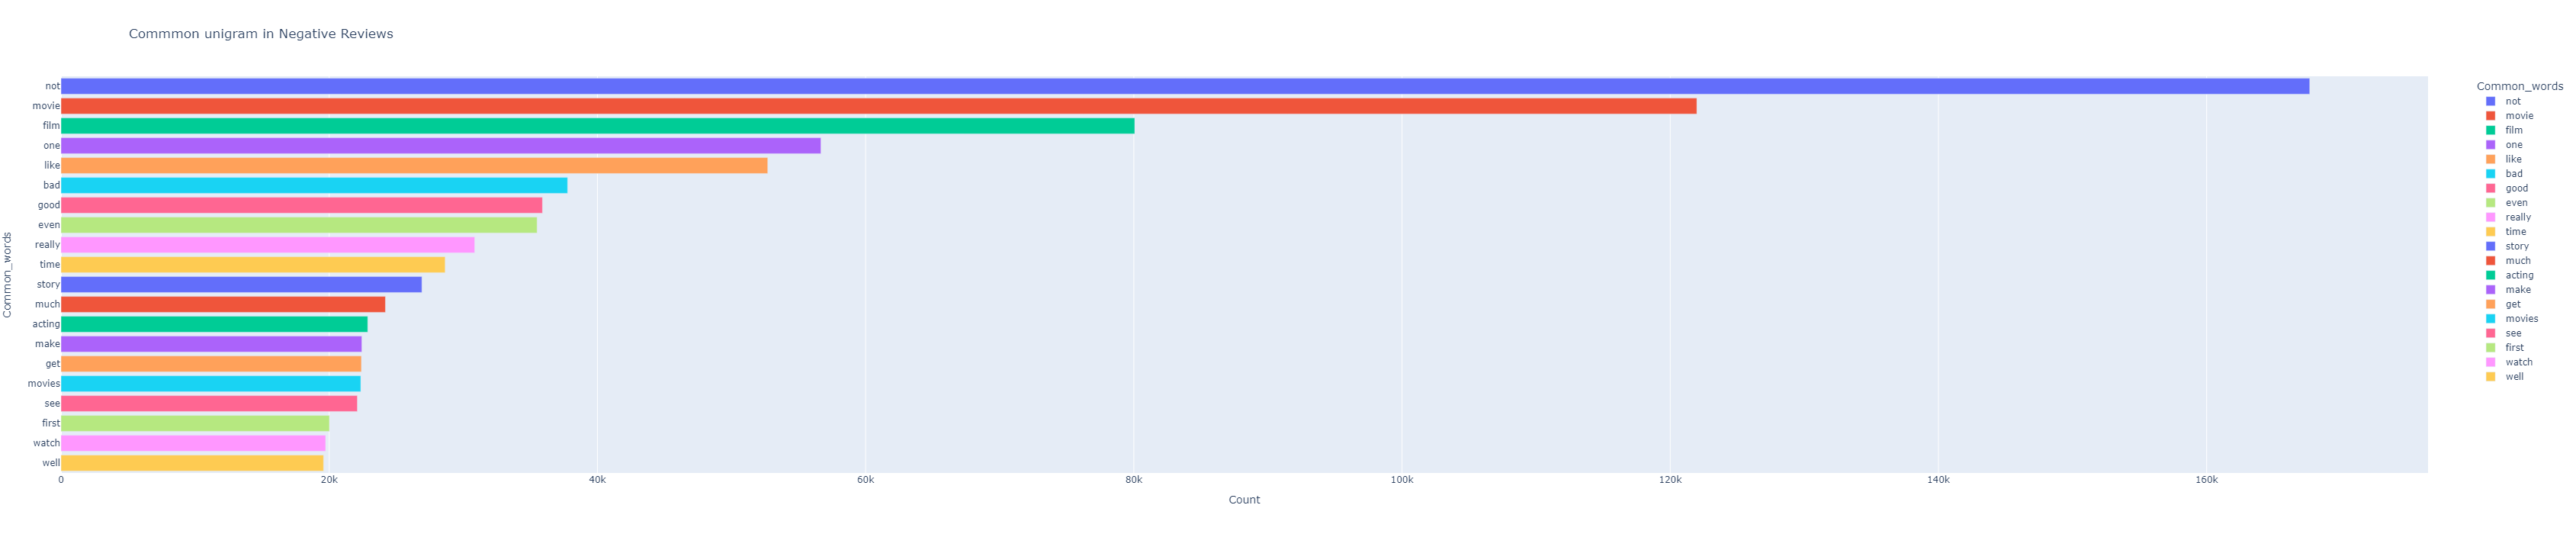

In [30]:
#top 20 unigram negative reviews
most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings']<=4],20,1)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon unigram in Negative Reviews', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

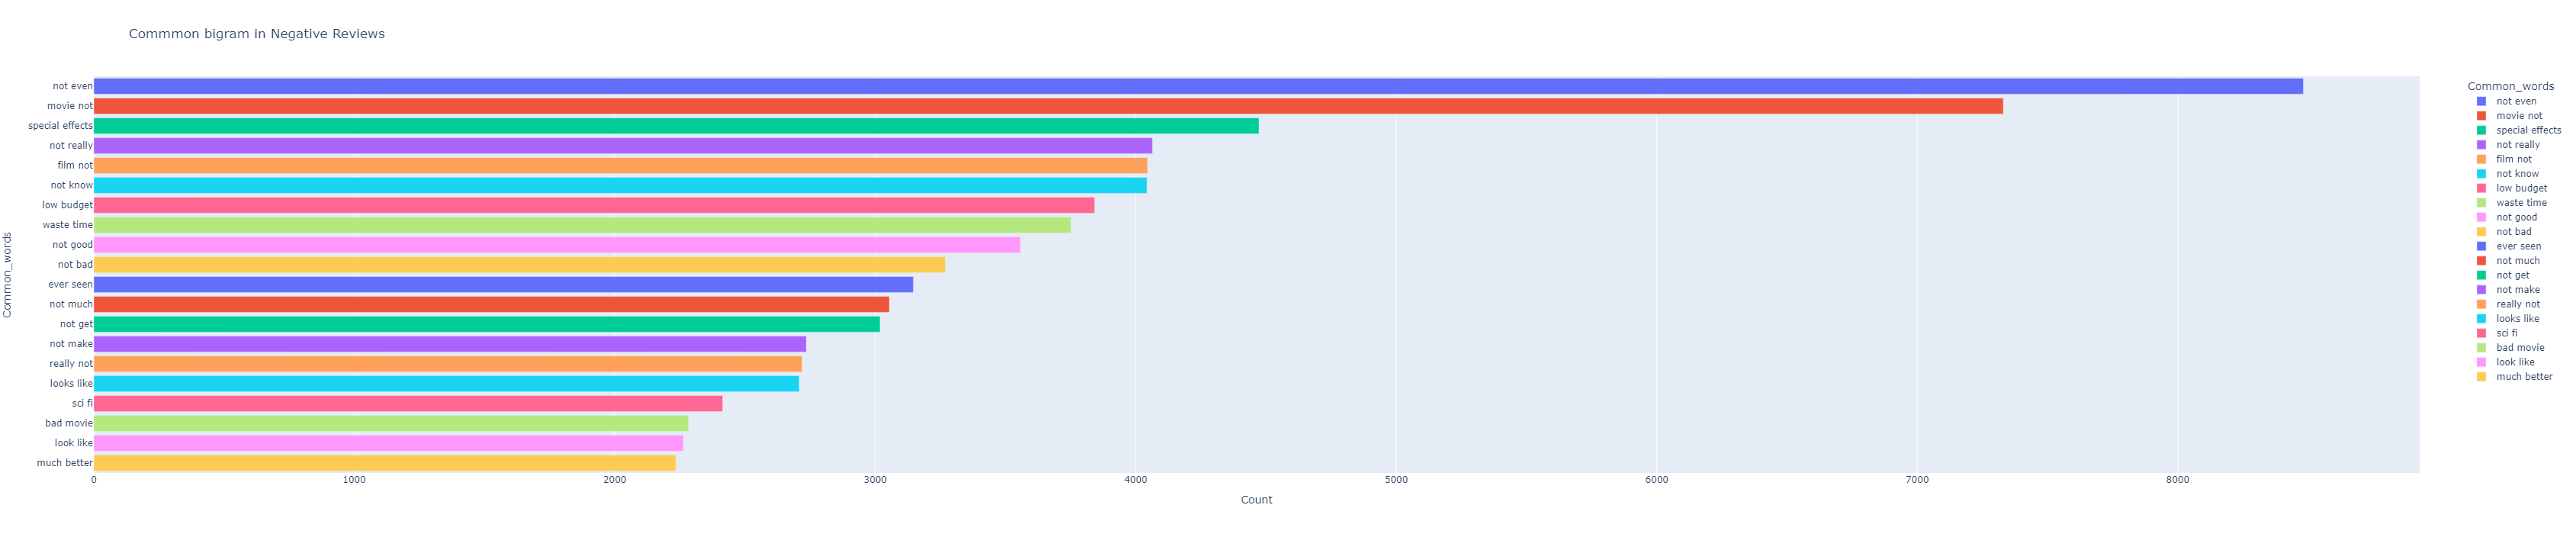

In [31]:
top 20 bigram neagtive reviews
most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings']<=4],20,2)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon bigram in Negative Reviews', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

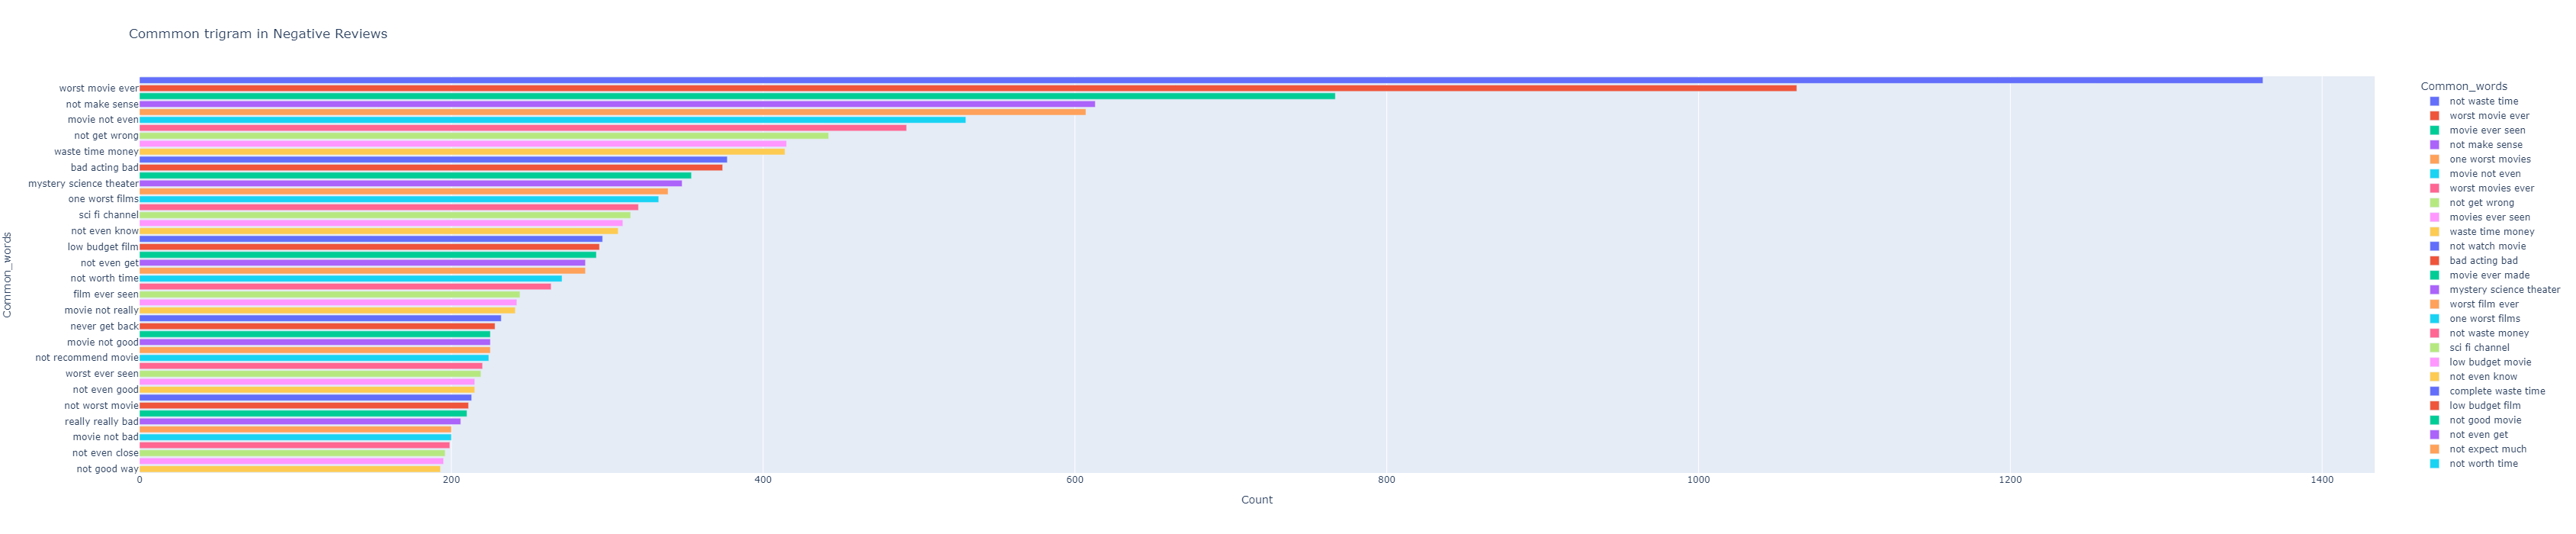

In [32]:
#top 20 trigram negative reviews
most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings']<=4],50,3)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon trigram in Negative Reviews', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

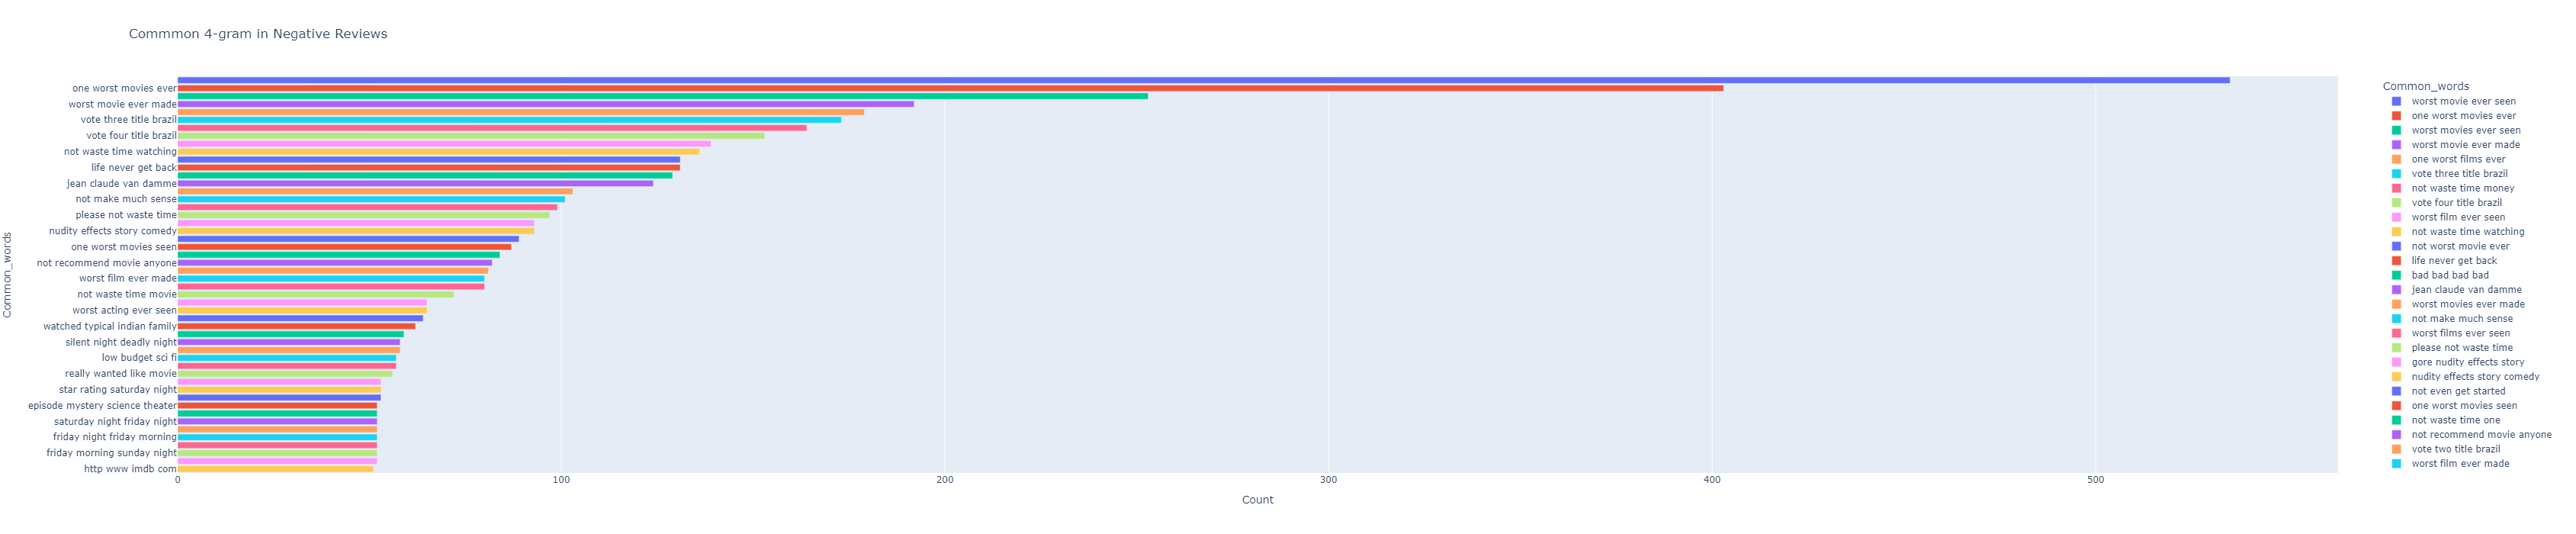

In [33]:
#top 50 4-gram negative reviews
most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings']<=4],50,4)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon 4-gram in Negative Reviews', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

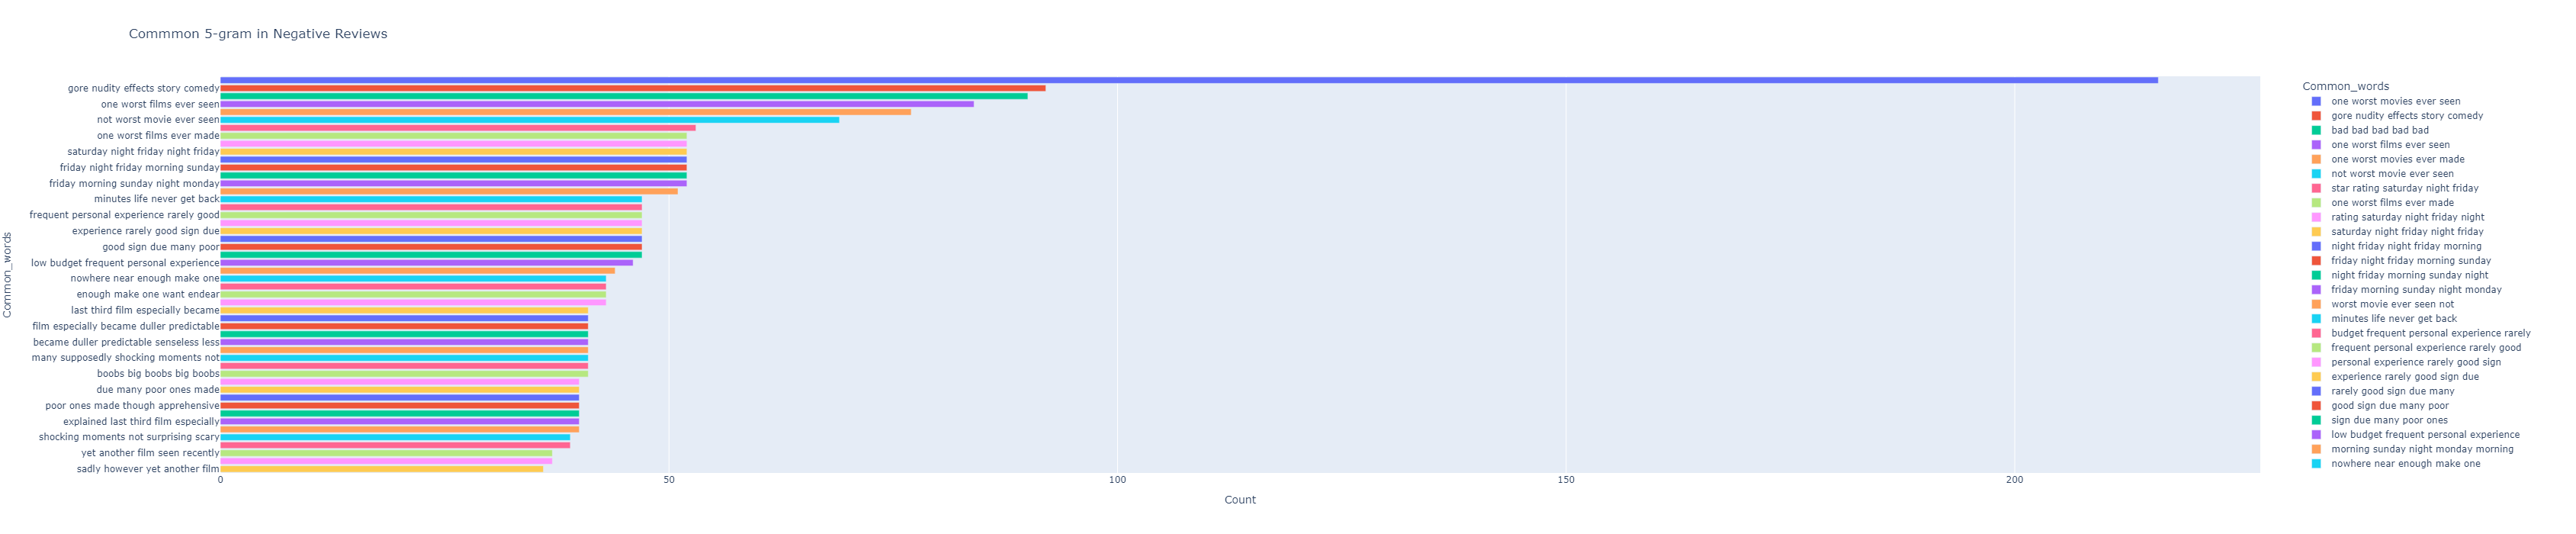

In [34]:
#top 50 5-gram negative reviews
most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings']<=4],50,5)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon 5-gram in Negative Reviews', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [35]:
pd.options.display.max_colwidth = 1000
df[["Reviews","Ratings","Movies"]][(df['Ratings']<=4)&(df['Reviews_clean'].str.contains("good|great"))].head(100)

,Reviews,Ratings,Movies
3,"If you saw the other previous spoof movies by these two horrible gentlemen, then you should know that this already will be bad. I'll tell you the truth, if you want to watch it as a brainless person (ironically meant for the stereotypical teenagers, which I am not) then you will laugh at it a bit. But if you judge it, even a little, the movie automatically fails. Why? Never ask that when it comes to these two men.Remember the good old Hollywood days whenever making a movie was about showing people a type of art, and also a story that kept you on the edge of your seat? Well whenever word hit that making films earned you loads of cash, then all these greedy people came in the picture and its quite pathetic. These two are no exception. We still have movie artists (most notably the genius that is Christopher Nolan). But these two guys just...well I've been writing so big words, let me put it in simple terms for these guys...These guys suck, they are not artists, but instead money cravi...",1.0,Disaster Movie
6,"I was given a free ticket to this film; so I can't complain that I was ripped off (except in that some 90 minutes of my life were irretrievably stolen from me). These sort of movies (Date Movie, Epic Movie, Meet the Spartans) haven't been funny for some time now but ""Disaster Movie"" has reached a new low. There wasn't one real laugh anywhere in the film, and most of the alleged ""jokes"" were actually painful. (There was a considerable amount of childish, mean-spirited stuff in the form of racist, sexist, and especially homophobic, garbage present, along with ample helpings of juvenile gross-outs.) None of the actors were even bothering to put up any pretense of acting. There is nothing hip, clever, or even mildly intelligent going on here. The entire film is from beginning to end crass, vulgar, irrational, and utterly humorless in any human sense. I know that in the past these sort of trash has made enough money to keep Seltzer et al., grinding them out but ""Disaster Movie"" may just...",1.0,Disaster Movie
7,"OK, so ""Disastrous"" isn't an imaginative barb for this movie, but then there's not a shred of wit to the movie, so....I saw this movie for free. A friend who said he ""pissed his pants"" at the trailer had free passes. I think he's incontinent.A spoof of disaster movies might have been fun. This is not it. A couple disaster movies get referenced, not really spoofed. Instead, the ""spoofing"" is of recent movies of all genres, and of aspects of current pop-culture. Then again, how current is women's wrestling or the ""Head On"" commercials?If there's anything about it that's good, there's the 70 minute or so running time (where did they get 90 minutes?) and Nicole Parker seems like she might be good, if she had good material.",1.0,Disaster Movie
11,"I decided to go see this movie with some friends, just to have a laugh. We were hoping that it would be so bad that it would become funny. But it was just awful... I just cant take that kid seriously.Also, this movie just confirmed what we all knew, JB has an ego even bigger then Kayne West. The entire movie was like: ""Look at me, i'm a talented singer and a good person! There is simply nothing that i can't do!""What the movie forgot to mention is that its his mommies fat cigar smoking managers that made JB. he's a puppet. This movie could make him look better, but it just buried him deeper. I'm starting to think that this was done on purpose because the fat cats want to get rid of him.Would not recommend.",1.0,Justin Bieber: Never Say Never
12,"Right so everyone here on IMDb is pretty much committed to giving this ""movie""(if you can call it that) 1 out of 10 to get it to no.1 on the bottom 100 list. Trust me, they're right.I went to see it because I knew there was no way I could criticize this movie without seeing it.However, the film lacks any artistic merit whatsoever. It is full of the latest and greatest pop sensations of the Youtube 

In [36]:
pd.options.display.max_colwidth = 1000
df[["Reviews","Ratings","Movies"]][(df['Ratings']<=4)&(df['Reviews_clean'].str.contains("saturday night friday"))].head(100)

,Reviews,Ratings,Movies
7055,"STAR RATING: ***** Saturday Night **** Friday Night *** Friday Morning ** Sunday Night * Monday Morning NO STARS End of Days A made for TV biopic of the pop icon Britney Spears (Natasha Bassett), from starting out with her breakthrough single Baby One More Time in 1999, where she was shoved into the limelight by her pushy mother Lynne (Nicole Oliver) and domineering manager Larry Rudolph (Peter Benson), who both naively thought she was old and mature enough to handle such massive media exposure and pushed her to lie about her virginity to keep up an illusion, through to the trials and turbulence of her relationships with Justin Timberlake (Nathan Keyes) and Kevin Federline (Clayton Chitty), before a revealing 2008 documentary aired.Sometimes, something can give you a really bad vibe, yet you still feel utterly compelled to see it. Your instinct can tell you it looks really bad, and you can see no end of bad reviews, and you can almost write a review before you've even seen it, but ...",1.0,Britney Ever After
17427,"STAR RATING: ***** Saturday Night **** Friday Night *** Friday Morning ** Sunday Night * Monday MorningWill (Joey Pollairi) is the new guy in high school, who stands out as a prime target for bullies. He soon makes friends with Jay (Zach Pearlman), Simon (Bubba Lewis) and Neil (Mark L. Young), three other social misfits who are not complete dorks but far from the coolest kids in school, either.It always spurs you on as a Brit when something home grown becomes a success, as I imagine it probably does for anyone from a small country that's not at the centre of the world (not anymore, anyway.) But it's a sad thing and a sign of the times when the only way to tell what a massive success it's been is when the Americans go and remake it. In fact, this is almost inevitable. And, inevitably, a whole lot worse.The best way I can describe The Inbetweeners USA is: imagine you've just read a really great Stephen King novel, and then see a film adaptation of it that is just like what you've rea...",2.0,The Inbetweeners
17818,"STAR RATING: ***** Saturday Night **** Friday Night *** Friday Morning ** Sunday Night * Monday Morning The premise behind this abysmal action thriller has a group of people going for a good old bit of paint ball, only to find themselves really fighting to stay alive as a barrage of real bullets are fired at them. But the characters are never developed or explored in any way, so it's impossible to care about any of them. Needless to say, there is no air of tension or suspense whatsoever, and the acting is so bad none of them have any life anyway, as though just running around shouting and screaming incoherently at each other gives them any life. Not that there was anything special to see there anyway, just the usual generic stereotypes typical for this genre. And here we have yet another film that hasn't learned the modern trend of shaking the camera around and darkening the lens is an off putting and annoying one rather than an endearing one. One to flee all round. *",2.0,Paintball
18138,"STAR RATING: ***** Saturday Night **** Friday Night *** Friday Morning ** Sunday Night * Monday Morning I could go to great pains to write a long, in depth review of The Last Seven, but it's hard to write much more about it other than my summary above. Right from the opening sequence, with one of the lead characters wondering around a deserted London shouting out for 'anybody!', just like in the aforementioned film, it just feels like such a pale imitation of it that it hurts. In fact, it's almost as if the director knew he was practically copying it scene for scene and just gave up bothering to tell any sort of decent story of his own. As such, it just goes through the motions of the post apocalyptic thriller genre, with the usual stereo-typical set up and characters, without firmly establishing the back story behind the majority of humanity being wiped out and making no sense. Most baffling